In [ ]:
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow


In [ ]:

# Read the image using OpenCV
image_path = '/content/BAR1.jpeg'
image = cv2.imread(image_path)


In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

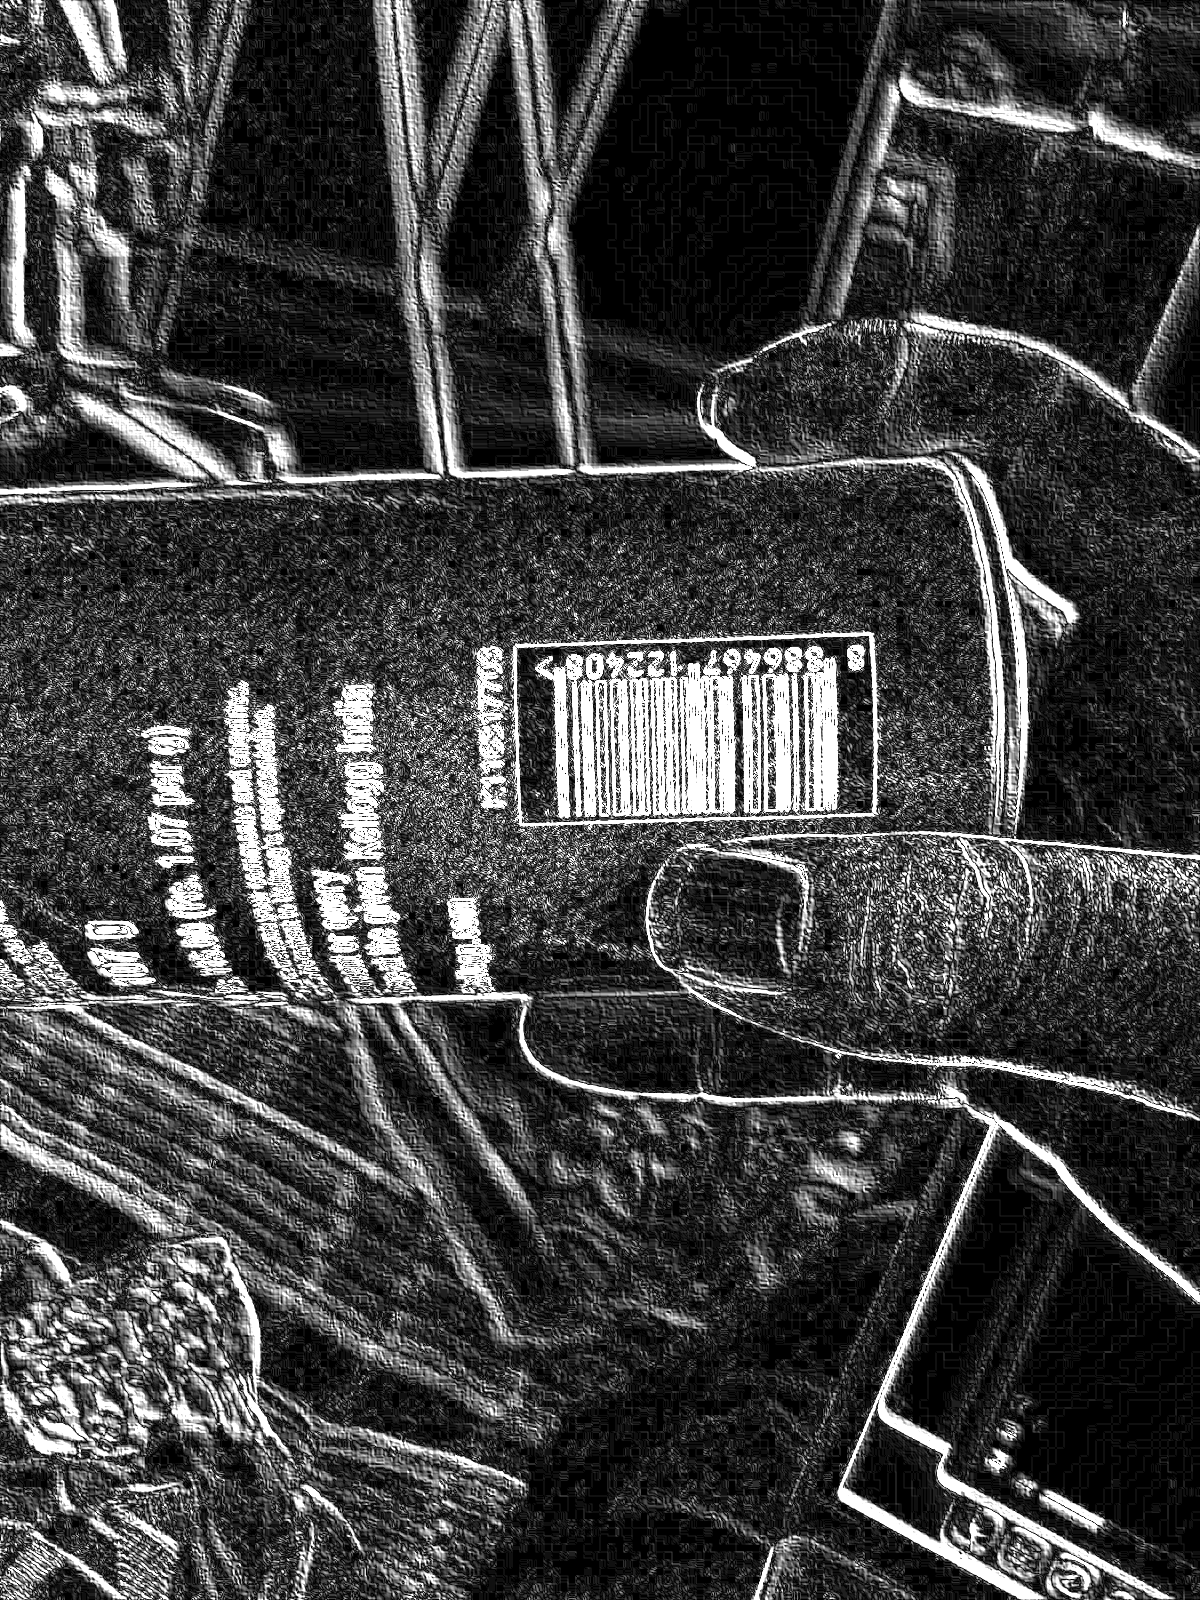

In [ ]:
cv2_imshow(gradient)

In [ ]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

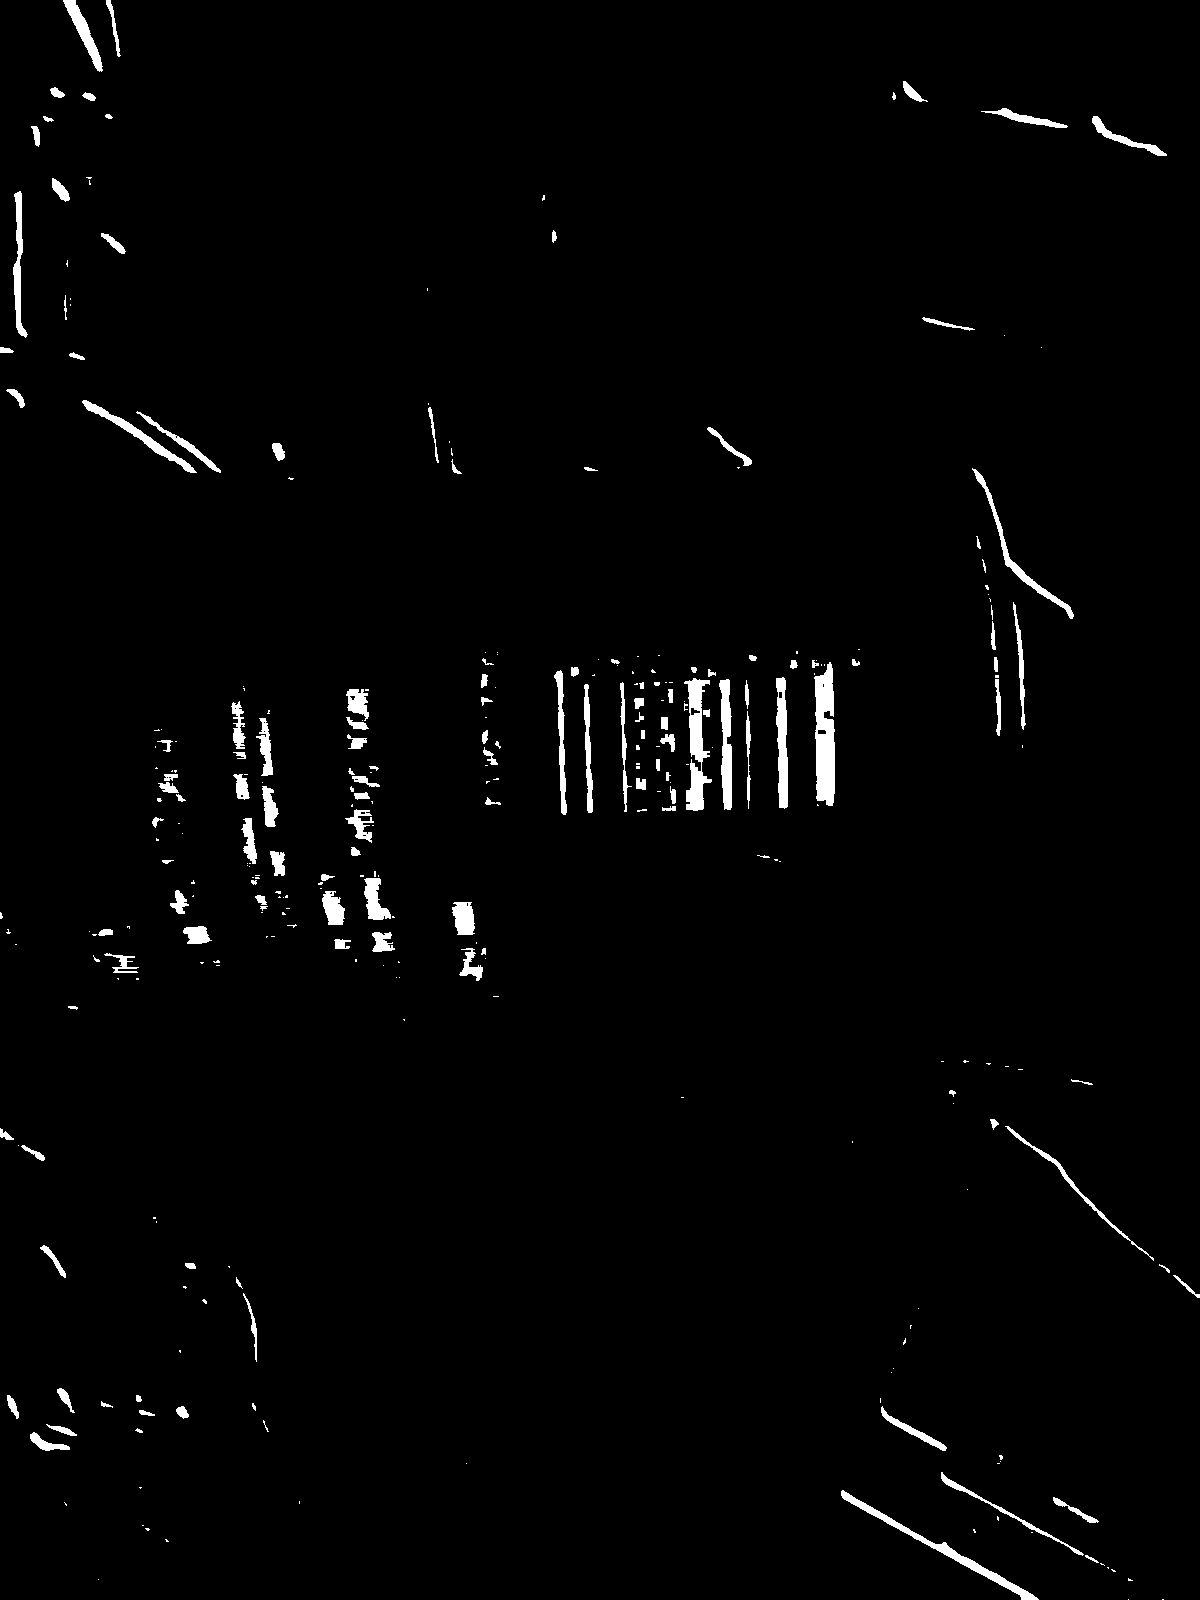

In [ ]:
cv2_imshow(thresh)

In [ ]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

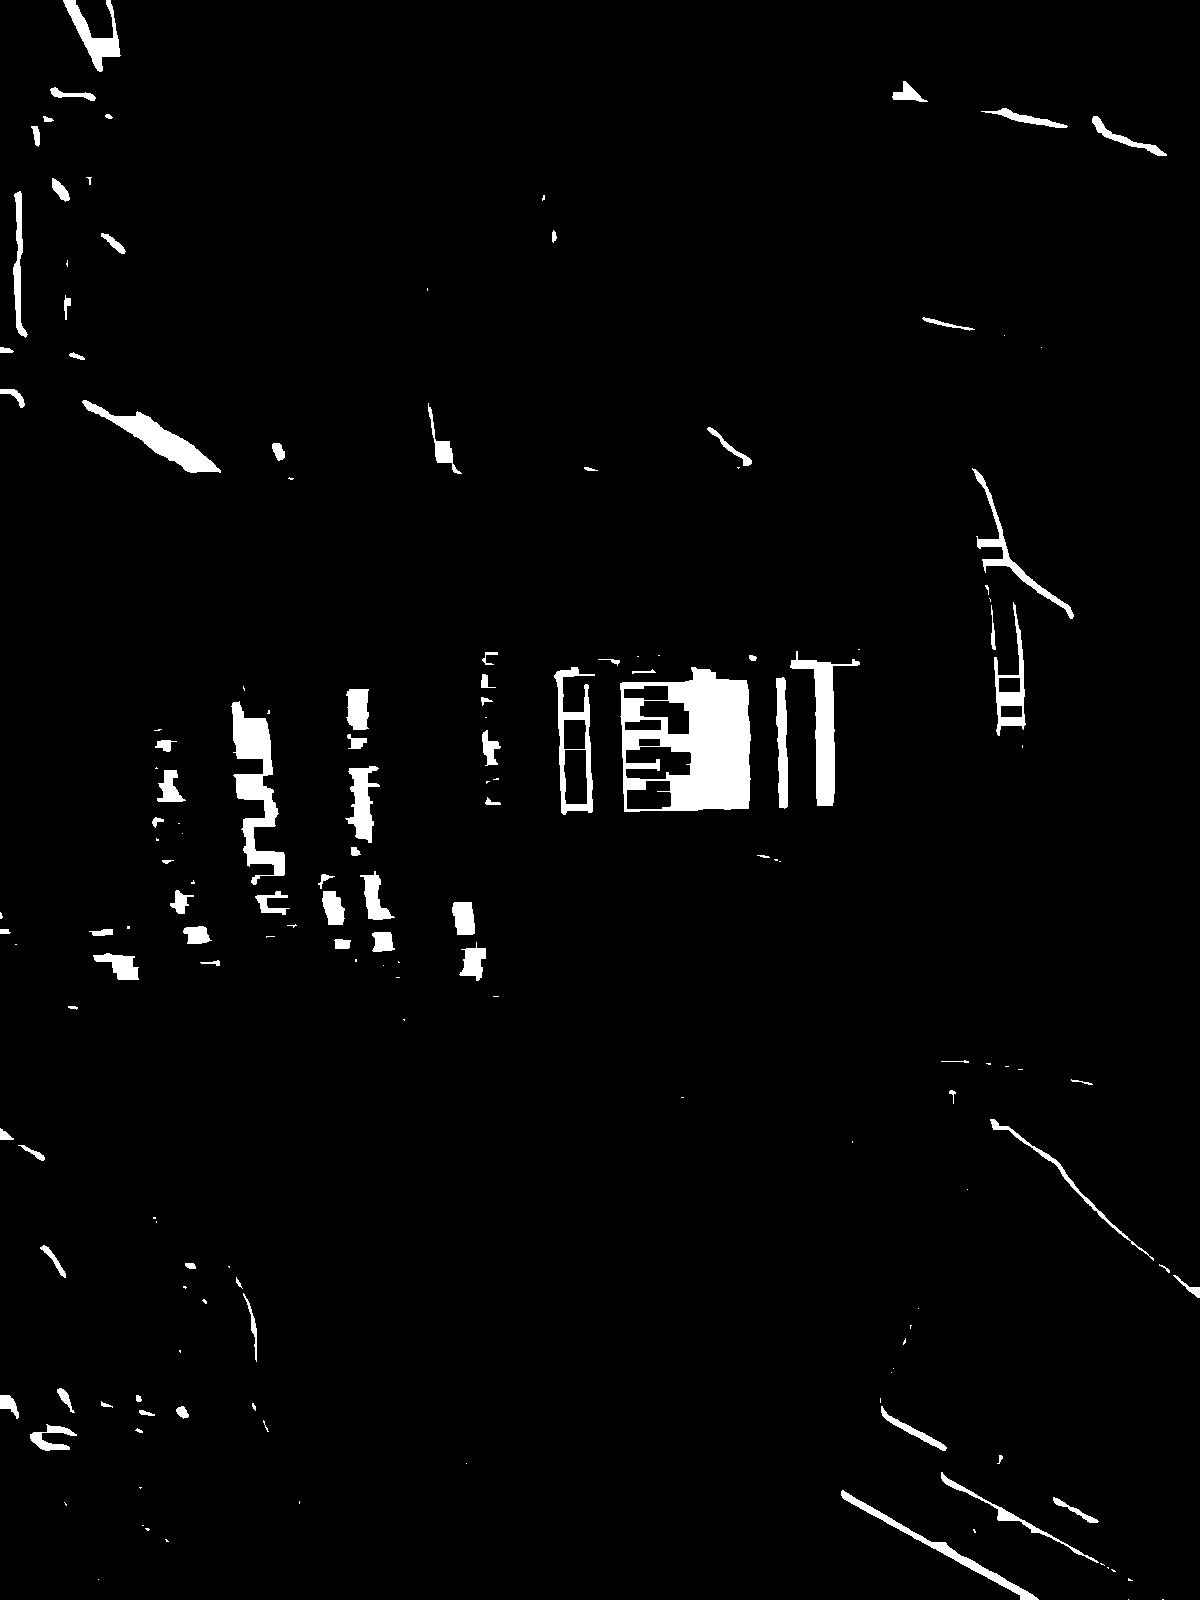

In [ ]:
cv2_imshow(closed)

In [ ]:
 #perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

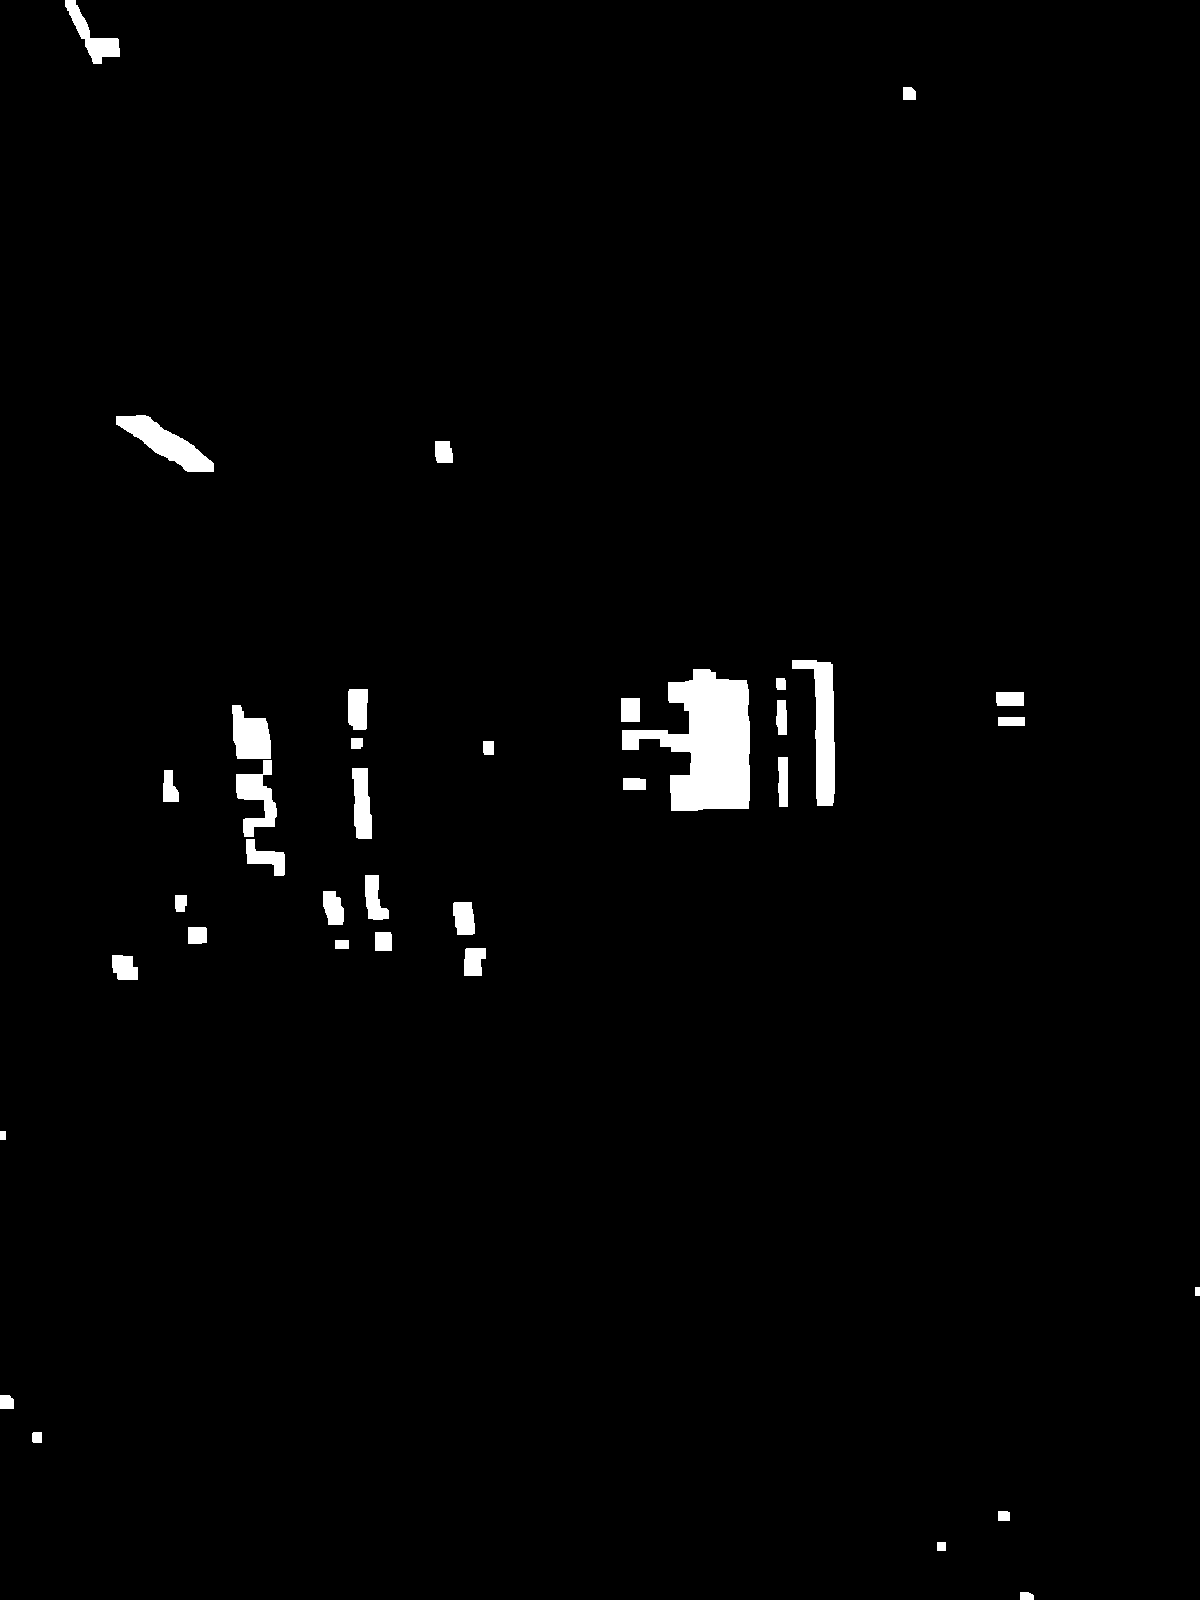

In [ ]:
cv2_imshow(closed)

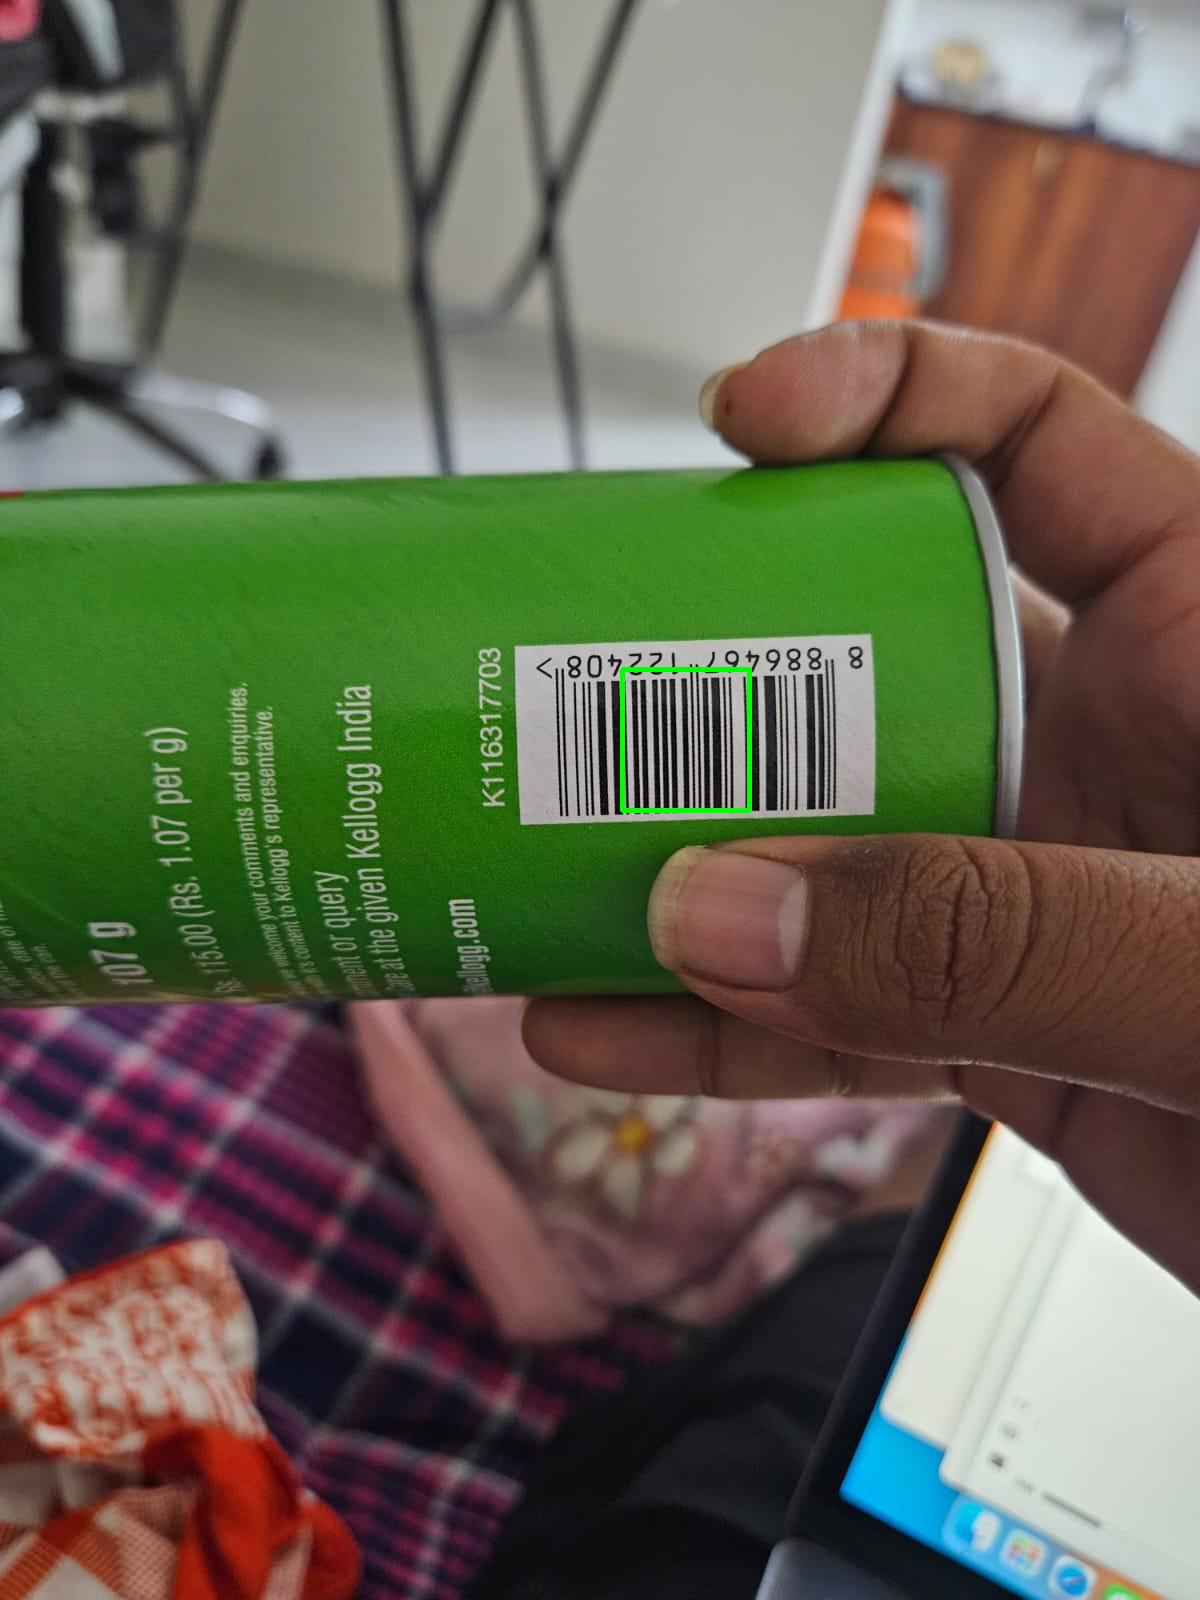

In [ ]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
cv2_imshow( image)
# rect